# Introduction to neural network classification with Tensorflow
**Classification:** Is where  you try to classify something as one thing or another.
1. Binary Classification
2. Multiple Classification
3. Multilabel Classification



# Creating data to view and fit


In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import CategoricalCrossentropy,BinaryCrossentropy

2023-01-16 15:13:38.186741: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-16 15:13:38.186781: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-16 15:13:39.078429: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-01-16 15:13:39.078547: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-01-16 15:13:39.078575: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT War

In [2]:
from sklearn.datasets import make_circles

#make 100 examples
n_samples = 1000

#create circles
X,y = make_circles(n_samples,
                  noise=0.03,
                  random_state=42)

In [3]:
#check our features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
#check labels
y[:10]


array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

# Our data is a littel hard to understand now.Lets Visualize it !


In [5]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


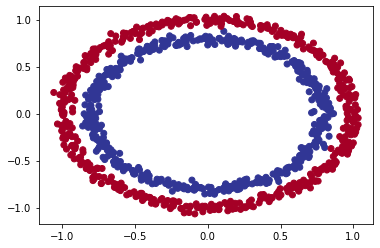

In [6]:
#visualise with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y, cmap=plt.cm.RdYlBu)

## Input & Output  shapes


In [7]:
#check the shapes of our features and labels
X.shape,y.shape

((1000, 2), (1000,))

In [8]:
#how many samples we're working  with
len(X),len(y)

(1000, 1000)

In [9]:
#view the first examples of features and labels
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

# Steps in modelling


The steps in modelling with TensorFlow are :
1. Create or import a model
2. Compile the model
3. Fit the model 
4. Evaluate the model
5. Tweak
6. Evalute
.
.
.

In [10]:
import tensorflow as tf
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import CategoricalCrossentropy,BinaryCrossentropy

In [11]:
#set random seed
tf.random.set_seed(42)

model=tf.keras.Sequential([
    Dense(units=1)
])

#compile it
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["accuracy"]
             )


#fit model
model.fit(X,
          y,
          epochs=5
)

2023-01-16 15:13:41.663633: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-16 15:13:41.663666: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-16 15:13:41.663695: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mylar-pc): /proc/driver/nvidia/version does not exist


Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 6.2931 - accuracy: 0.4870
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 6.2897 - accuracy: 0.4850
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 6.2875 - accuracy: 0.4850
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 6.2860 - accuracy: 0.4850
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 6.2744 - accuracy: 0.4860


In [12]:
#improving model by training for longer
model.fit(X,y,epochs=200,verbose=0)

In [13]:
model.evaluate(X,y)#not right to evelaute with trainning data but just for experimental sake


32/32 [==============================] - 0s 2ms/step - loss: 4.6053 - accuracy: 0.4690


[4.6052680015563965, 0.4690000116825104]

since we're working on binary classification problem and our model is getting around ~50% accuracy .. it's performing as if it's guessing.


So let's step thing up a notch and add an extra layer


#model 1

In [14]:
#set random seed
tf.random.set_seed(42)

model_1=tf.keras.Sequential([
    Dense(units=10),
    Dense(units=1)
])

#compile it
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["accuracy"]
             )


#fit model
model_1.fit(X,
          y,
          epochs=100
)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 1.7326 - accuracy: 0.4930
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6982 - accuracy: 0.5110
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6990 - accuracy: 0.4750
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6961 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.4800
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.5150
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.4690
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6957 - accuracy: 0.5120
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6969 - accuracy: 0.4830
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6951 - accuracy: 0.4660
Epoch 11/

32/32 [==============================] - 0s 2ms/step - loss: 0.6957 - accuracy: 0.4960
Epoch 84/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6974 - accuracy: 0.4940
Epoch 85/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6957 - accuracy: 0.4830
Epoch 86/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.5100
Epoch 87/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6969 - accuracy: 0.4710
Epoch 88/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6974 - accuracy: 0.4570
Epoch 89/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6972 - accuracy: 0.4790
Epoch 90/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6957 - accuracy: 0.5060
Epoch 91/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6975 - accuracy: 0.4960
Epoch 92/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6960 - accuracy: 0.5070
Epoch 93/100


In [15]:
model_1.evaluate(X,y) #Again not right to evaluate on the same trainning data

32/32 [==============================] - 0s 1ms/step - loss: 0.6958 - accuracy: 0.5000


[0.6957911252975464, 0.5]

The model seems to still be around a 50% accuracy so we still have to tweak
it 

# model 2

In [16]:
#seed
tf.random.set_seed(42)

#create model
model_2 = tf.keras.Sequential([
    Dense(units=100),
    Dense(units=10),
    Dense(units=1)
    
])


#compile it
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy']
            

)

# Fit MODEL
model_2.fit(X,
           y,
           epochs=10)

Epoch 1/10
32/32 [==============================] - 1s 2ms/step - loss: 0.8655 - accuracy: 0.4630
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6971 - accuracy: 0.5050
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7014 - accuracy: 0.4750
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6974 - accuracy: 0.4920
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.4970
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6959 - accuracy: 0.5260
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6989 - accuracy: 0.4970
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6967 - accuracy: 0.5070
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6988 - accuracy: 0.4810
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.4680


# Model 3

In [17]:
tf.random.set_seed(42)

#Create model
model_3=tf.keras.Sequential([
    Dense(units=100,activation='relu'),
    Dense(units=10,activation='relu'),
    Dense(units=1)
    
])

#compile model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy']
                

)

#fit model
History = model_3.fit(X,
                     y,
                     epochs=10)

Epoch 1/10
32/32 [==============================] - 1s 2ms/step - loss: 1.0126 - accuracy: 0.4750
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7071 - accuracy: 0.4870
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6986 - accuracy: 0.5040
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5000
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6858 - accuracy: 0.5050
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6805 - accuracy: 0.5700
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6776 - accuracy: 0.6540
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6723 - accuracy: 0.6860
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6674 - accuracy: 0.7160
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6617 - accuracy: 0.7160


Text(0.5, 0, 'epochs')

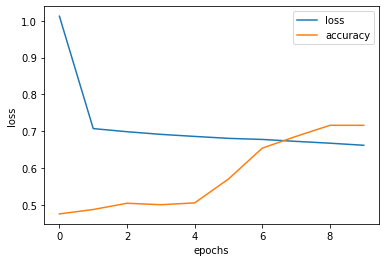

In [18]:
# PLOT HISTORY (also know as a loss curve or a training curve)
pd.DataFrame(History.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [19]:
X.shape,y.shape

((1000, 2), (1000,))

In [20]:
model_3.evaluate(X,y)#not right to evelaute with the same training data


32/32 [==============================] - 0s 2ms/step - loss: 0.6579 - accuracy: 0.7740


[0.657901406288147, 0.7739999890327454]

# Model 4

In [21]:
tf.random.set_seed(42)

#Create model
model_4=tf.keras.Sequential([
    Dense(units=10),
    Dense(units=5),
    Dense(units=1)
    
])

#compile model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy']
                

)

#fit model
history=model_4.fit(X,
            y,
            epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.9739 - accuracy: 0.4450
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6976 - accuracy: 0.4990
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7025 - accuracy: 0.4650
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6977 - accuracy: 0.4960
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.5040
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.5220
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7000 - accuracy: 0.4940
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6972 - accuracy: 0.5090
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6997 - accuracy: 0.4880
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6974 - accuracy: 0.4510
Epoch 11/

32/32 [==============================] - 0s 2ms/step - loss: 0.6972 - accuracy: 0.4960
Epoch 84/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6993 - accuracy: 0.4830
Epoch 85/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6966 - accuracy: 0.4900
Epoch 86/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6963 - accuracy: 0.5080
Epoch 87/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6987 - accuracy: 0.4860
Epoch 88/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6989 - accuracy: 0.4740
Epoch 89/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6993 - accuracy: 0.4800
Epoch 90/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6972 - accuracy: 0.4990
Epoch 91/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6989 - accuracy: 0.4970
Epoch 92/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6975 - accuracy: 0.5190
Epoch 93/100


In [22]:
model_4.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6989 - accuracy: 0.5000


[0.6989040970802307, 0.5]

Text(0.5, 0, 'epochs')

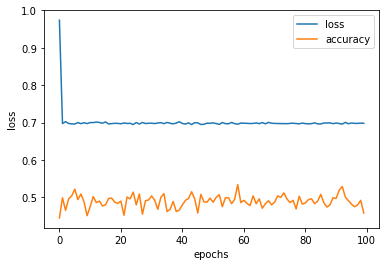

In [23]:
# PLOT HISTORY (also know as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# Model 5


In [24]:
tf.random.set_seed(42)

#Create model
model_5=tf.keras.Sequential([
    Dense(units=10,activation='relu'),
    Dense(units=5,activation='relu'),
    Dense(units=1)
    
])

#compile model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy']
                

)

#fit model
history5=model_5.fit(X,
            y,
            epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 7.4073 - accuracy: 0.4920
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 11/

32/32 [==============================] - 0s 4ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 84/100
32/32 [==============================] - 0s 4ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 85/100
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 86/100
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 87/100
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 88/100
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 89/100
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 90/100
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 91/100
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 92/100
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 93/100


In [25]:
model_5.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

In [26]:
model_5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                30        
                                                                 
 dense_13 (Dense)            (None, 5)                 55        
                                                                 
 dense_14 (Dense)            (None, 1)                 6         
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


# visualize some of its predictions


In [27]:
model_4.predict(X)

32/32 [==============================] - 0s 2ms/step


array([[0.4465563 ],
       [0.45682034],
       [0.4576595 ],
       [0.46420294],
       [0.42765653],
       [0.46455997],
       [0.46333602],
       [0.44483954],
       [0.43436292],
       [0.4682981 ],
       [0.442755  ],
       [0.45958546],
       [0.46467552],
       [0.43603975],
       [0.43227014],
       [0.43213543],
       [0.44883737],
       [0.43222097],
       [0.45249045],
       [0.4389473 ],
       [0.45167834],
       [0.4685543 ],
       [0.42937806],
       [0.4475551 ],
       [0.46375516],
       [0.45909938],
       [0.46433577],
       [0.4387221 ],
       [0.43150106],
       [0.43413833],
       [0.43340328],
       [0.46855608],
       [0.462791  ],
       [0.44046724],
       [0.4285573 ],
       [0.46716598],
       [0.46324864],
       [0.458058  ],
       [0.4319267 ],
       [0.4543716 ],
       [0.43805683],
       [0.46294862],
       [0.44075873],
       [0.43700573],
       [0.4435353 ],
       [0.44850472],
       [0.43059295],
       [0.461

# Visualization

 ***To viusalise our models prediction lets create a function 'plot_descision_boundary()', this funnction will:***
1. Take in a trained model , features X and label y
2. create a meshgred of the difference X values
3. make predictions accross the meshgid
4. Plot the predictions as  wel as a line  between  zones(where each unique class falls)

# useful modules
* meshgrid
* np.linspace
* np.c_


In [28]:
import numpy as np

In [29]:



def plot_decision_boundary(model,X,y):
    '''
    Plots the decision boundary created by a model prediction on X.
    '''
    #Define the axis boundaries of the  plot and create a meshgrid
    x_min,x_max= X[:, 0].min() - 0.1 , X[:, 0].max() + 0.1
    y_min,y_max= X[:, 1].min() - 0.1 , X[:, 1].max() + 0.1
    
    xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),
                       np.linspace(y_min,y_max,100))
    
    
    #create X values (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(),yy.ravel()]#stacks 2D arr together
    
    #make predictions
    y_pred= model.predict(x_in)
    
    
    #check for multi-class
    if len(y_pred[0])>1:
        print('doing multiclass classification')
        #we have to reshape our prediction to get them ready fro plotting
        y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)
    else:
        print('doing binary classification')
        y_pred = np.round(y_pred).reshape(xx.shape)
        
    #Plot tthe decision boundry
    plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu, alpha = 0.7)
    plt.scatter(X[:, 0], X[:,1], c=y , s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(), yy.max())
    
     

In [30]:
x_min,x_max= X[:, 0].min() - 0.1 , X[:, 0].max() + 0.1
y_min,y_max= X[:, 1].min() - 0.1 , X[:, 1].max() + 0.1

x_min,x_max,y_min,y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

In [31]:
y_pred=model_3.predict(X)

32/32 [==============================] - 0s 1ms/step


In [32]:
y_pred.shape

(1000, 1)

313/313 [==============================] - 0s 1ms/step
doing binary classification


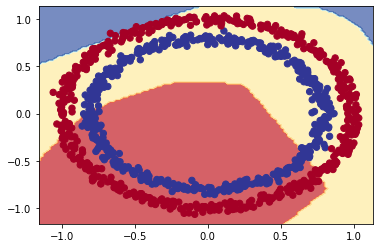

In [44]:
#check out the decisions predictions our model is making
plot_decision_boundary(model=model_5,
                       X=X,
                       y=y)

In [34]:
#lets see if our model can be used for a regrression problem

tf.random.set_seed(42)

#create Some reggression data
X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5) # y = X + 100

#spliting our regression data into training and test
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]





In [35]:
#Fit  our model to the regression data
model_2.fit(X_reg_train,
           y_reg_train,  
            epochs=100)

Epoch 1/100


ValueError: in user code:

    File "/home/mylar/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "/home/mylar/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/mylar/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "/home/mylar/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "/home/mylar/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/mylar/anaconda3/lib/python3.9/site-packages/keras/engine/input_spec.py", line 250, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_2' (type Sequential).
    
    Input 0 of layer "dense_3" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer 'sequential_2' (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=int32)
      • training=True
      • mask=None


In [36]:
X_reg_train.shape,y_reg_train.shape

(TensorShape([150]), TensorShape([150]))

 We compiled  our model for a binary classification problem.
 But ...we're now working on a regression prob, lets change  the model  to suit our data

In [45]:
# Set sed
tf.random.set_seed(42)

#create model
model_2 = tf.keras.Sequential([
    Dense(units=100),
    Dense(units=10),
    Dense(units=1)
])
#compile model,this time with a regression specific loss fucntion

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']
)

#fit model
model_2.fit(X_reg_train,
            y_reg_train,
            epochs=100)


Epoch 1/100


ValueError: in user code:

    File "/home/mylar/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "/home/mylar/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/mylar/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "/home/mylar/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "/home/mylar/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/mylar/anaconda3/lib/python3.9/site-packages/keras/engine/input_spec.py", line 250, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_7' (type Sequential).
    
    Input 0 of layer "dense_18" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer 'sequential_7' (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=int32)
      • training=True
      • mask=None


In [46]:
# Set sed
tf.random.set_seed(42)

#create model
model1 = tf.keras.Sequential([
    Dense(units=10),
    Dense(units=1)
])
#compile model,this time with a regression specific loss fucntion

model1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']
)

#fit model
model1.fit(X_reg_train,
            y_reg_train,
            epochs=100)


Epoch 1/10


ValueError: in user code:

    File "/home/mylar/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "/home/mylar/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/mylar/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "/home/mylar/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "/home/mylar/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/mylar/anaconda3/lib/python3.9/site-packages/keras/engine/input_spec.py", line 250, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_8' (type Sequential).
    
    Input 0 of layer "dense_21" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer 'sequential_8' (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=int32)
      • training=True
      • mask=None
